<h1 style="color:white;background-color:black;text-align:center;font-size:350%;font-family:monotype corsiva">Karan Agrawal</h1><h2 style="color:white;background-color:black;text-align:center;font-size:250%;font-family:monotype corsiva">Apple Stock</h2>

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import datetime

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [3]:
x=pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv")

### Step 3. Assign it to a variable apple

In [4]:
apple=x

### Step 4.  Check out the type of the columns

In [5]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [12]:
apple["Date"]=apple["Date"].astype("datetime64")

### Step 6.  Set the date as the index

In [22]:
apple.set_index("Date",inplace=True)

### Step 7.  Is there any duplicate dates?

In [34]:
apple.loc[apple.index.duplicated()]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [48]:
apple.sort_index(inplace=True)

### Step 9. Get the last business day of each month

In [111]:
dates=apple.index
dic={}
for date in dates:
#     print(date)
    x=dic.get(str(date.year)+"-"+str(date.month),0)
    if date.day>x:
        dic[str(date.year)+"-"+str(date.month)]=date.day
print("Last Business Days of Each Month: ")
print(pd.Series(dic))

Last Business Days of Each Month: 
1980-12    31
1981-1     30
1981-2     27
1981-3     31
1981-4     30
           ..
2014-3     31
2014-4     30
2014-5     30
2014-6     30
2014-7      8
Length: 404, dtype: int64


### Step 10.  What is the difference in days between the first day and the oldest

In [84]:
apple.index[-1]-apple.index[0]

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [87]:
end=apple.index[-1]
start=apple.index[1]
(end.year-start.year)*12-(start.month-end.month)

403

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

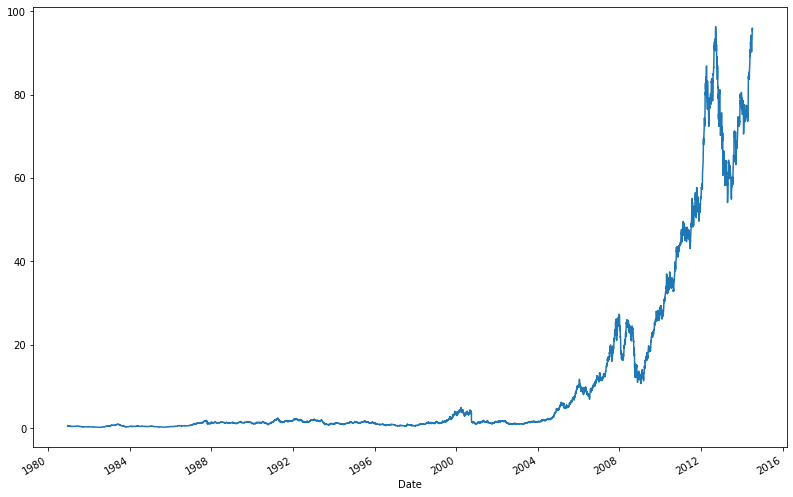

In [94]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(13.5,9))
apple["Adj Close"].plot()

### BONUS: Create your own question and answer it.

### Q-> Which Day Was Apple's Worst Trading Day Till 2014-07-08	???

In [130]:
apple.sort_values("Volume",ascending=False).Volume[:1]

Date
2000-09-29    1855410200
Name: Volume, dtype: int64

In [127]:
apple.loc["2000-09-28"]

Open         4.931000e+01
High         5.381000e+01
Low          4.812000e+01
Close        5.350000e+01
Volume       2.448964e+08
Adj Close    3.650000e+00
Name: 2000-09-28 00:00:00, dtype: float64

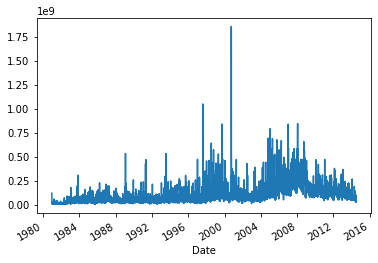

In [166]:
apple.Volume.plot()
plt.show()

### On Date 2000-09-29
##### Apple Saw its Worst Trading Day Ever with about 52 % of its last Day's Divident value.
##### As on 2000-09-29 Volume Was-> 1855410200
##### As on 2000-09-28 Volume Was-> 244896400 
##### And Difference was->1610513800
##### So apple hot about 52 % on 2000-09-29
##### It have never hit that much till 2014-07-08.